In [1]:
import numpy as np
import pandas as pd
from IPython.display import display

from worldview import analysis, preprocessor, vizer

# Show full dataframes when printing
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: "%.5f" % x)
np.set_printoptions(threshold=100, suppress=True)

# Set display format to 4 decimal places
pd.options.display.float_format = "{:.4f}".format

df = preprocessor.create_prepped_data()

Number of rows with a tie for the maximum worldview score: 34


# Interpreting p-values
Note that the p-values are truncated at 3 digits. Thus if you see a p-value of .000, that is the same as p < .001. 

16 participants had a tie for dominant world view. We can drop them from analysis (what I did below), or do the more complex cluster analysis. That would be a significant effort though. 

# Distributions and descriptive stats for QES and ISI subscales. 
These are helpful to see what the average values and distributions are for your study sample. For example, with this you can report the mean and standard deviation for the scales/subscales for all your participants in the study. 

We also see the distributions, which can help guide what statistical tests we use later. For example, many statistics have normality assumptions. p-values for Kolmogorov-Smirnov Test of less than .05 indicate we have non-normal distributions. Don't worry about the non-normal distributions for now - we just need to know that because some statistical tests have assumptions around normality. For example, we might have to address that when we do the multinommial logistic regressions.

You can uses the stats below to report out means and standard deviations - maybe putting them into a table, depending on your preference. 

*** Normality Checks for: qes_total ***

Descriptive Statistics:
count   406.0000
mean     54.4286
std       7.1284
min      29.0000
25%      50.0000
50%      54.5000
75%      59.0000
max      70.0000
Name: qes_total, dtype: float64
Skewness: -0.300389072312282
Kurtosis: 0.4294606392406801
Kolmogorov-Smirnov Test: Statistic=0.06157194049235526, p-value=0.08827417043045571


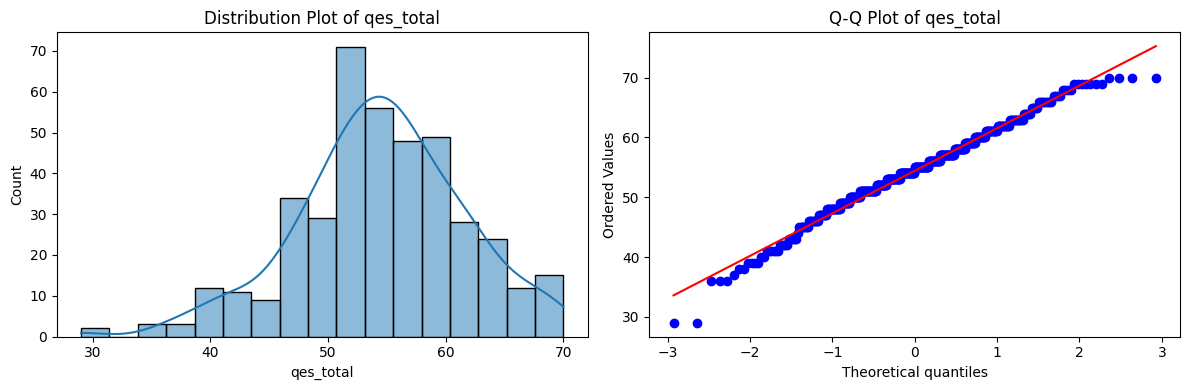

---------------------------------------- 

*** Normality Checks for: isi_diffuse_avoidant_total ***

Descriptive Statistics:
count   406.0000
mean     17.6182
std       6.5016
min       9.0000
25%      12.0000
50%      17.0000
75%      22.0000
max      39.0000
Name: isi_diffuse_avoidant_total, dtype: float64
Skewness: 0.7883036067352799
Kurtosis: 0.16704937560365085
Kolmogorov-Smirnov Test: Statistic=0.09776865714733385, p-value=0.0007878650131697077


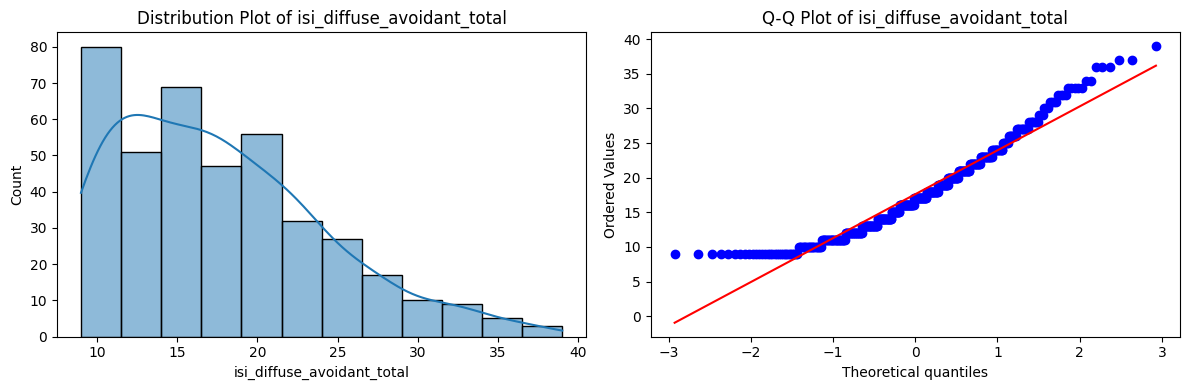

---------------------------------------- 

*** Normality Checks for: isi_informational_total ***

Descriptive Statistics:
count   406.0000
mean     35.1355
std       6.1927
min       9.0000
25%      32.0000
50%      36.0000
75%      40.0000
max      45.0000
Name: isi_informational_total, dtype: float64
Skewness: -0.7854493858547602
Kurtosis: 0.8477715531466736
Kolmogorov-Smirnov Test: Statistic=0.10211109686567982, p-value=0.00038716529586329586


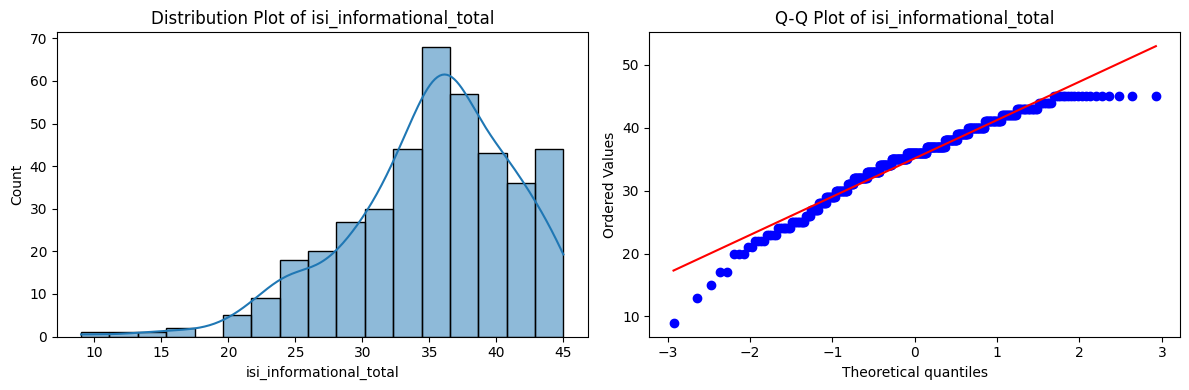

---------------------------------------- 

*** Normality Checks for: isi_normative_total ***

Descriptive Statistics:
count   406.0000
mean     18.3350
std       6.8028
min       9.0000
25%      13.0000
50%      17.0000
75%      22.0000
max      45.0000
Name: isi_normative_total, dtype: float64
Skewness: 1.0109525508857318
Kurtosis: 0.8663999663202175
Kolmogorov-Smirnov Test: Statistic=0.12197542048205884, p-value=1.0099121356908519e-05


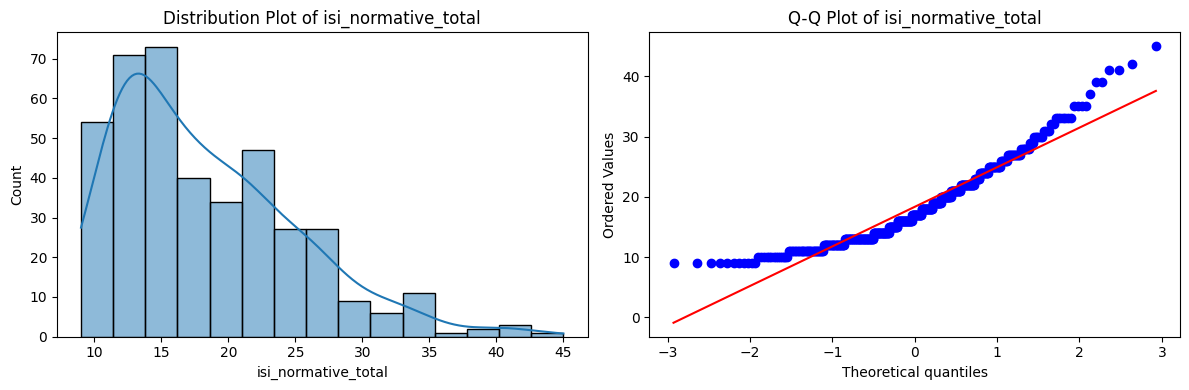

---------------------------------------- 



In [2]:
vizer.check_normality(
    df[
        [
            "qes_total",
            "isi_diffuse_avoidant_total",
            "isi_informational_total",
            "isi_normative_total",
        ]
    ]
)

The QES scores follow a normal distribution, but the ISI scales are non-normal, which we see from the test stats and the plots. We will come back to this later when we do statistical analysis. We may need to do transformations, or use slightly different statistics that don't have the normality assumptions. 

# Pearson Correlations

Pearson's correlations are used for looking at the relationship between 2 continuous variables. 

This answers if there are significant relationships between each of the continuous scales/subscales in your study. The r column is the correlation. This also provides 95% confidence intervals for your correlations.

In [3]:
corrs = analysis.pearsons_correlation_matrix(
    df[
        [
            "qes_total",
            "isi_diffuse_avoidant_total",
            "isi_informational_total",
            "isi_normative_total",
        ]
    ]
)

print(corrs)

                            X                           Y       r  \
0                   qes_total  isi_diffuse_avoidant_total -0.3475   
1                   qes_total     isi_informational_total  0.5497   
2                   qes_total         isi_normative_total -0.1756   
3  isi_diffuse_avoidant_total     isi_informational_total -0.1879   
4  isi_diffuse_avoidant_total         isi_normative_total  0.2039   
5     isi_informational_total         isi_normative_total  0.0293   

            CI95%  p-value   df  Sample Size  
0  [-0.43, -0.26]   0.0000  404          406  
1    [0.48, 0.61]   0.0000  404          406  
2  [-0.27, -0.08]   0.0004  404          406  
3  [-0.28, -0.09]   0.0001  404          406  
4     [0.11, 0.3]   0.0000  404          406  
5   [-0.07, 0.13]   0.5555  404          406  


All are significant, other than between isi informational and isi normative, which is non-significant. 

Here is an example of how I'd write these up. 

Pearson's correlations were conducted to examine the relationships between quiet ego and the identity style subscales, as seen in table x. Individuals with higher scores on the Quiet Ego Scale tend to have lower scores on the diffuse-avoidant and normative identity style subscales, and higher scores on informational. 

I'd then put the correlations into a table that follows apa style. 

# Spearman's Correlations - Age

Age is ordinal (since it is grouped), so we use a spearman correlation. You interpret it the same way. 

First is using all age groups. 

In [4]:
age_corrs = analysis.calculate_spearman_correlations(
    df,
    "age_group_ordinal",
    [
        "qes_total",
        "isi_diffuse_avoidant_total",
        "isi_informational_total",
        "isi_normative_total",
    ],
)

display(age_corrs)

,X,Y,rs,CI95%,p-value,df,Sample Size
0,age_group_ordinal,qes_total,-0.0028,"[-0.1, 0.09]",0.9556,404,406
1,age_group_ordinal,isi_diffuse_avoidant_total,-0.1876,"[-0.28, -0.09]",0.0001,404,406
2,age_group_ordinal,isi_informational_total,-0.1231,"[-0.22, -0.03]",0.0131,404,406
3,age_group_ordinal,isi_normative_total,-0.0984,"[-0.19, -0.0]",0.0474,404,406


Relationships between age group and isi subscales are significant. Age group and qes is not significant. 

The correlations that are significant are negative, meaning that in general, older participants have lower ISI scores on all the scales - perhaps they are more middle of the road on things/less extreme with age? Here are the means/standard deviations by age group for reporting - I included all scales regardless of significance, just in case you get asked for it. 

In [5]:
# mean/sd/count(num participants) for ISI by age group
age_group_stats = df.groupby("age_group")[
    [
        "qes_total",
        "isi_diffuse_avoidant_total",
        "isi_informational_total",
        "isi_normative_total",
    ]
].agg(["mean", "std", "count"])

display(age_group_stats)

qes_total              isi_diffuse_avoidant_total               \
               mean    std count                       mean    std count   
age_group                                                                  
25-34       54.3433 6.8968   134                    18.9403 7.0003   134   
35-44       54.7521 7.7525   117                    17.8034 6.2329   117   
45-54       54.8592 7.0149    71                    17.2394 6.4220    71   
55-64       53.3333 5.9969    54                    15.9259 5.7062    54   
65-74       53.7826 8.7332    23                    14.9565 5.8191    23   
75+         56.8571 4.2984     7                    14.8571 4.4508     7   

          isi_informational_total              isi_normative_total         \
                             mean    std count                mean    std   
age_group                                                                   
25-34                     35.8358 5.8092   134             19.3358 7.5642   
35-44                     35.9829 5.8383   117             18.1282 6.8827   
45-54                     34.3239 6.2969    71             18.3521 5.6798   
55-64                     33.1481 6.7584    54             17.6667 6.3751   
65-74                     33.3478 7.1580    23             15.7391 5.8560   
75+                       37.0000 6.5574     7             16.1429 4.4508   

                 
          count  
age_group        
25-34       134  
35-44       117  
45-54        71  
55-64        54  
65-74        23  
75+           7

Same analysis as above, but making a 65+ group by combining the last two

In [6]:
age_corrs = analysis.calculate_spearman_correlations(
    df,
    "age_group_65_ordinal",
    [
        "qes_total",
        "isi_diffuse_avoidant_total",
        "isi_informational_total",
        "isi_normative_total",
    ],
)

display(age_corrs)

,X,Y,rs,CI95%,p-value,df,Sample Size
0,age_group_65_ordinal,qes_total,-0.0036,"[-0.1, 0.09]",0.9430,404,406
1,age_group_65_ordinal,isi_diffuse_avoidant_total,-0.1877,"[-0.28, -0.09]",0.0001,404,406
2,age_group_65_ordinal,isi_informational_total,-0.1242,"[-0.22, -0.03]",0.0123,404,406
3,age_group_65_ordinal,isi_normative_total,-0.0987,"[-0.19, -0.0]",0.0468,404,406


In [7]:
# mean/sd/count(num participants) for ISI by age group
age_group_stats = df.groupby("age_group_65")[
    [
        "qes_total",
        "isi_diffuse_avoidant_total",
        "isi_informational_total",
        "isi_normative_total",
    ]
].agg(["mean", "std", "count"])

display(age_group_stats)

qes_total              isi_diffuse_avoidant_total               \
                  mean    std count                       mean    std count   
age_group_65                                                                  
25-34          54.3433 6.8968   134                    18.9403 7.0003   134   
35-44          54.7521 7.7525   117                    17.8034 6.2329   117   
45-54          54.8592 7.0149    71                    17.2394 6.4220    71   
55-64+         53.3333 5.9969    54                    15.9259 5.7062    54   
65+            54.5000 7.9644    30                    14.9333 5.4579    30   

             isi_informational_total              isi_normative_total         \
                                mean    std count                mean    std   
age_group_65                                                                   
25-34                        35.8358 5.8092   134             19.3358 7.5642   
35-44                        35.9829 5.8383   117             18.1282 6.8827   
45-54                        34.3239 6.2969    71             18.3521 5.6798   
55-64+                       33.1481 6.7584    54             17.6667 6.3751   
65+                          34.2000 7.0876    30             15.8333 5.4903   

                    
             count  
age_group_65        
25-34          134  
35-44          117  
45-54           71  
55-64+          54  
65+             30

Same analysis as above, but making a 55+ group by combining ages

In [8]:
age_corrs = analysis.calculate_spearman_correlations(
    df,
    "age_group_55_ordinal",
    [
        "qes_total",
        "isi_diffuse_avoidant_total",
        "isi_informational_total",
        "isi_normative_total",
    ],
)

display(age_corrs)

,X,Y,rs,CI95%,p-value,df,Sample Size
0,age_group_55_ordinal,qes_total,-0.0074,"[-0.1, 0.09]",0.8814,404,406
1,age_group_55_ordinal,isi_diffuse_avoidant_total,-0.1851,"[-0.28, -0.09]",0.0002,404,406
2,age_group_55_ordinal,isi_informational_total,-0.1286,"[-0.22, -0.03]",0.0095,404,406
3,age_group_55_ordinal,isi_normative_total,-0.0941,"[-0.19, 0.0]",0.0583,404,406


In [9]:
# mean/sd/count(num participants) for ISI by age group
age_group_stats = df.groupby("age_group_55")[
    [
        "qes_total",
        "isi_diffuse_avoidant_total",
        "isi_informational_total",
        "isi_normative_total",
    ]
].agg(["mean", "std", "count"])

display(age_group_stats)

qes_total              isi_diffuse_avoidant_total               \
                  mean    std count                       mean    std count   
age_group_55                                                                  
25-34          54.3433 6.8968   134                    18.9403 7.0003   134   
35-44          54.7521 7.7525   117                    17.8034 6.2329   117   
45-54          54.8592 7.0149    71                    17.2394 6.4220    71   
55+            53.7500 6.7411    84                    15.5714 5.6061    84   

             isi_informational_total              isi_normative_total         \
                                mean    std count                mean    std   
age_group_55                                                                   
25-34                        35.8358 5.8092   134             19.3358 7.5642   
35-44                        35.9829 5.8383   117             18.1282 6.8827   
45-54                        34.3239 6.2969    71             18.3521 5.6798   
55+                          33.5238 6.8539    84             17.0119 6.1045   

                    
             count  
age_group_55        
25-34          134  
35-44          117  
45-54           71  
55+             84

# Spearman's Correlations - Education

Education is ordinal (since it is grouped, with higher values indicating more education), so we use a spearman correlation. You interpret it the same way as a Pearson's correlation. 

The first results here are using all levels of education from the study. The second set of results are when we combined some into 5 groups. 

In [10]:
education_corrs = analysis.calculate_spearman_correlations(
    df[df["education_ordinal"].notna()],
    "education_ordinal",
    [
        "qes_total",
        "isi_diffuse_avoidant_total",
        "isi_informational_total",
        "isi_normative_total",
    ],
)

display(education_corrs)

,X,Y,rs,CI95%,p-value,df,Sample Size
0,education_ordinal,qes_total,0.0744,"[-0.02, 0.17]",0.1358,401,403
1,education_ordinal,isi_diffuse_avoidant_total,-0.0924,"[-0.19, 0.01]",0.0640,401,403
2,education_ordinal,isi_informational_total,0.1601,"[0.06, 0.25]",0.0013,401,403
3,education_ordinal,isi_normative_total,0.0991,"[0.0, 0.19]",0.0467,401,403


Education level is significantly related to ISI informational and ISI normative. Those correlations are positive, indicating the ISI informational/normative scores are higher with more education. The others are not significant. 

Here are the means/standard deviations by education group.

In [11]:
# mean/sd/count(num participants) for ISI by education
education_group_stats = df.groupby("education")[
    [
        "qes_total",
        "isi_diffuse_avoidant_total",
        "isi_informational_total",
        "isi_normative_total",
    ]
].agg(["mean", "std", "count"])

display(education_group_stats)

qes_total               \
                                          mean    std count   
education                                                     
1-2 years college/associate’s degree   54.3544 7.8529    79   
Attended trade school/certifications   54.8571 4.7056     7   
Graduated with Bachelors               53.7039 6.8936   152   
Graduated with PhD                     57.3478 6.5686    23   
Graduated with master’s degree         55.6835 6.3236    79   
Highschool gradate or proficiency      54.2766 8.1633    47   
Some graduate school                   52.5000 7.0805    16   

                                     isi_diffuse_avoidant_total               \
                                                           mean    std count   
education                                                                      
1-2 years college/associate’s degree                    18.5190 7.4968    79   
Attended trade school/certifications                    17.2857 4.8206     7   
Graduated with Bachelors                                17.5395 6.2929   152   
Graduated with PhD                                      16.9130 4.7760    23   
Graduated with master’s degree                          16.5570 6.0970    79   
Highschool gradate or proficiency                       18.8723 7.4473    47   
Some graduate school                                    16.4375 5.1247    16   

                                     isi_informational_total               \
                                                        mean    std count   
education                                                                   
1-2 years college/associate’s degree                 34.3544 6.9375    79   
Attended trade school/certifications                 36.0000 7.7460     7   
Graduated with Bachelors                             35.2434 5.5397   152   
Graduated with PhD                                   37.8696 4.3621    23   
Graduated with master’s degree                       36.5949 5.7635    79   
Highschool gradate or proficiency                    33.0638 7.3585    47   
Some graduate school                                 33.6875 5.6771    16   

                                     isi_normative_total               
                                                    mean    std count  
education                                                              
1-2 years college/associate’s degree             15.6962 5.6350    79  
Attended trade school/certifications             19.4286 4.7208     7  
Graduated with Bachelors                         20.1382 7.5266   152  
Graduated with PhD                               18.6522 6.8464    23  
Graduated with master’s degree                   18.1013 6.1657    79  
Highschool gradate or proficiency                17.5319 6.5569    47  
Some graduate school                             17.1250 5.0580    16

Same as above but with our updated version with 5 groups

In [12]:
education_corrs = analysis.calculate_spearman_correlations(
    df[df["education_ordinal_5_levels"].notna()],
    "education_ordinal",
    [
        "qes_total",
        "isi_diffuse_avoidant_total",
        "isi_informational_total",
        "isi_normative_total",
    ],
)

display(education_corrs)

,X,Y,rs,CI95%,p-value,df,Sample Size
0,education_ordinal,qes_total,0.0744,"[-0.02, 0.17]",0.1358,401,403
1,education_ordinal,isi_diffuse_avoidant_total,-0.0924,"[-0.19, 0.01]",0.0640,401,403
2,education_ordinal,isi_informational_total,0.1601,"[0.06, 0.25]",0.0013,401,403
3,education_ordinal,isi_normative_total,0.0991,"[0.0, 0.19]",0.0467,401,403


In [13]:
# mean/sd/count(num participants) for ISI by education
education_group_stats = df.groupby("education_5_levels")[
    [
        "qes_total",
        "isi_diffuse_avoidant_total",
        "isi_informational_total",
        "isi_normative_total",
    ]
].agg(["mean", "std", "count"])

display(education_group_stats)

qes_total               \
                                                        mean    std count   
education_5_levels                                                          
1-2 years college/associate’s degree/trade scho...   54.3953 7.6270    86   
Graduated with Bachelors                             53.5893 6.8990   168   
Graduated with PhD                                   57.3478 6.5686    23   
Graduated with master’s degree                       55.6835 6.3236    79   
Highschool gradate or proficiency                    54.2766 8.1633    47   

                                                   isi_diffuse_avoidant_total  \
                                                                         mean   
education_5_levels                                                              
1-2 years college/associate’s degree/trade scho...                    18.4186   
Graduated with Bachelors                                              17.4345   
Graduated with PhD                                                    16.9130   
Graduated with master’s degree                                        16.5570   
Highschool gradate or proficiency                                     18.8723   

                                                                 \
                                                      std count   
education_5_levels                                                
1-2 years college/associate’s degree/trade scho... 7.3026    86   
Graduated with Bachelors                           6.1864   168   
Graduated with PhD                                 4.7760    23   
Graduated with master’s degree                     6.0970    79   
Highschool gradate or proficiency                  7.4473    47   

                                                   isi_informational_total  \
                                                                      mean   
education_5_levels                                                           
1-2 years college/associate’s degree/trade scho...                 34.4884   
Graduated with Bachelors                                           35.0952   
Graduated with PhD                                                 37.8696   
Graduated with master’s degree                                     36.5949   
Highschool gradate or proficiency                                  33.0638   

                                                                 \
                                                      std count   
education_5_levels                                                
1-2 years college/associate’s degree/trade scho... 6.9718    86   
Graduated with Bachelors                           5.5546   168   
Graduated with PhD                                 4.3621    23   
Graduated with master’s degree                     5.7635    79   
Highschool gradate or proficiency                  7.3585    47   

                                                   isi_normative_total         \
                                                                  mean    std   
education_5_levels                                                              
1-2 years college/associate’s degree/trade scho...             16.0000 5.6360   
Graduated with Bachelors                                       19.8512 7.3693   
Graduated with PhD                                             18.6522 6.8464   
Graduated with master’s degree                                 18.1013 6.1657   
Highschool gradate or proficiency                              17.5319 6.5569   

                                                          
                                                   count  
education_5_levels                                        
1-2 years college/associate’s degree/trade scho...    86  
Graduated with Bachelors                             168  
Graduated with PhD                                    23  
Graduated with master’s degree                        79  
Highschool gradate or pr

# T-tests - Gender

Look for significant differences in QES and ISI subscales by Gender. We dropped the few non-binary respondents. 

In [14]:
for scale in [
    "qes_total",
    "isi_diffuse_avoidant_total",
    "isi_informational_total",
    "isi_normative_total",
]:
    result = analysis.get_independent_ttest(
        df[df["gender"] != "nonbinary"], x="gender", y=scale
    )

    display(result)

    print(f"Mean/SD/count for {scale} by gender:")
    display(
        df[df["gender"] != "nonbinary"]
        .groupby("gender")[[scale]]
        .agg(["mean", "std", "count"])
    )


Is there a significant difference in qes_total by gender?
Using standard Student's t-test due to equal sample sizes (ratio <= 2:1).
There is no significant difference in qes_total by gender (p = 0.089).


,Metric,Value
0,Test Used,Student's t-test (pooled variances)
1,Group Sizes,"male: 208, female: 189"
2,T-Statistic,-1.7046
3,P-Value,0.0891
4,Degrees of Freedom,395.0000


Mean/SD/count for qes_total by gender:


qes_total             
            mean    std count
gender                       
female   55.0635 6.7914   189
male     53.8365 7.4841   208


Is there a significant difference in isi_diffuse_avoidant_total by gender?
Using standard Student's t-test due to equal sample sizes (ratio <= 2:1).
There is no significant difference in isi_diffuse_avoidant_total by gender (p = 0.086).


,Metric,Value
0,Test Used,Student's t-test (pooled variances)
1,Group Sizes,"male: 208, female: 189"
2,T-Statistic,1.7230
3,P-Value,0.0857
4,Degrees of Freedom,395.0000


Mean/SD/count for isi_diffuse_avoidant_total by gender:


isi_diffuse_avoidant_total             
                             mean    std count
gender                                        
female                    17.0212 6.2942   189
male                      18.1538 6.7585   208


Is there a significant difference in isi_informational_total by gender?
Using standard Student's t-test due to equal sample sizes (ratio <= 2:1).
There is no significant difference in isi_informational_total by gender (p = 0.902).


,Metric,Value
0,Test Used,Student's t-test (pooled variances)
1,Group Sizes,"male: 208, female: 189"
2,T-Statistic,0.1232
3,P-Value,0.9020
4,Degrees of Freedom,395.0000


Mean/SD/count for isi_informational_total by gender:


isi_informational_total             
                          mean    std count
gender                                     
female                 35.0476 6.3784   189
male                   35.1250 6.1325   208


Is there a significant difference in isi_normative_total by gender?
Using standard Student's t-test due to equal sample sizes (ratio <= 2:1).
There is no significant difference in isi_normative_total by gender (p = 0.096).


,Metric,Value
0,Test Used,Student's t-test (pooled variances)
1,Group Sizes,"male: 208, female: 189"
2,T-Statistic,1.6705
3,P-Value,0.0956
4,Degrees of Freedom,395.0000


Mean/SD/count for isi_normative_total by gender:


isi_normative_total             
                      mean    std count
gender                                 
female             17.8466 6.9246   189
male               18.9904 6.7114   208

No significant differences in QES or ISI subscales by gender.

# One-Way ANOVAs - Religion

Look for differences in QES and ISI subscales by religion. We took people who answered "catholic" to the other question and put them in the "christian" group. For those that answered "none" or some variation of "not religious", we put them in the "atheist" group. We then combined Judaism, Buddhist, Hindu, and Muslim into "Other", since those groups were so small. 

For each scale, I included the means and standard deviations by education. If the ANOVA was significant, I included the post-hoc tests. 

In [15]:
for scale in [
    "qes_total",
    "isi_diffuse_avoidant_total",
    "isi_informational_total",
    "isi_normative_total",
]:
    print(f"Is there a significant difference in {scale} by religion?")
    anova_table, tukey_results = analysis.one_way_anova(
        df=df[df["religious_spiritual_orientation_reduced"].notna()],
        group_col="religious_spiritual_orientation_reduced",
        dv_col=scale,
    )

    display(anova_table)

    if tukey_results is not None:
        print(
            f"There was a significant difference, indicating that values for {scale} were different for at least one group.\n"
        )
        print("Post hoc Tukey HSD results to see what group(s) differed:")
        print(tukey_results)
    else:
        print("No significant differences.")

    print(f"\nMean/SD/count for {scale} by religion:")
    display(
        df[df["religious_spiritual_orientation_reduced"].notna()]
        .groupby("religious_spiritual_orientation_reduced")[[scale]]
        .agg(["mean", "std", "count"])
    )
    print("\n")

Is there a significant difference in qes_total by religion?


,df,sum_sq,mean_sq,F,PR(>F)
C(religious_spiritual_orientation_reduced),4.0000,398.5942,99.6486,1.9751,0.0976
Residual,376.0000,18969.6315,50.4511,NaN,NaN


No significant differences.

Mean/SD/count for qes_total by religion:


qes_total             
                                             mean    std count
religious_spiritual_orientation_reduced                       
Agnostic                                  54.2927 6.6230    82
Atheist                                   52.4915 7.4449    59
Christian                                 54.2912 7.4007   182
Other                                     54.4000 5.8407    15
Spiritually eclectic                      56.4884 6.5660    43



Is there a significant difference in isi_diffuse_avoidant_total by religion?


,df,sum_sq,mean_sq,F,PR(>F)
C(religious_spiritual_orientation_reduced),4.0000,473.9590,118.4898,2.8123,0.0253
Residual,376.0000,15841.7943,42.1324,NaN,NaN


There was a significant difference, indicating that values for isi_diffuse_avoidant_total were different for at least one group.

Post hoc Tukey HSD results to see what group(s) differed:
         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
  group1         group2        meandiff p-adj   lower   upper  reject
---------------------------------------------------------------------
 Agnostic              Atheist  -1.1647 0.8312 -4.2021  1.8727  False
 Agnostic            Christian  -1.5726 0.3626  -3.939  0.7938  False
 Agnostic                Other   1.3878 0.9414 -3.6086  6.3842  False
 Agnostic Spiritually eclectic  -3.5238 0.0337 -6.8738 -0.1739   True
  Atheist            Christian  -0.4079 0.9935 -3.0734  2.2576  False
  Atheist                Other   2.5525 0.6537 -2.5923  7.6974  False
  Atheist Spiritually eclectic  -2.3591 0.3678 -5.9266  1.2084  False
Christian                Other   2.9604 0.4365  -1.819  7.7399  False
Christian Spiritually eclectic  -1.9512  0

isi_diffuse_avoidant_total         \
                                                              mean    std   
religious_spiritual_orientation_reduced                                     
Agnostic                                                   19.0122 7.2222   
Atheist                                                    17.8475 6.6949   
Christian                                                  17.4396 6.3450   
Other                                                      20.4000 6.5115   
Spiritually eclectic                                       15.4884 5.2024   

                                               
                                        count  
religious_spiritual_orientation_reduced        
Agnostic                                   82  
Atheist                                    59  
Christian                                 182  
Other                                      15  
Spiritually eclectic                       43



Is there a significant difference in isi_informational_total by religion?


,df,sum_sq,mean_sq,F,PR(>F)
C(religious_spiritual_orientation_reduced),4.0000,19.3962,4.8490,0.1233,0.9741
Residual,376.0000,14792.9503,39.3430,NaN,NaN


No significant differences.

Mean/SD/count for isi_informational_total by religion:


isi_informational_total             
                                                           mean    std count
religious_spiritual_orientation_reduced                                     
Agnostic                                                34.8415 5.8783    82
Atheist                                                 35.0169 6.6111    59
Christian                                               35.1868 6.3227   182
Other                                                   35.3333 6.0079    15
Spiritually eclectic                                    35.6279 6.3958    43



Is there a significant difference in isi_normative_total by religion?


,df,sum_sq,mean_sq,F,PR(>F)
C(religious_spiritual_orientation_reduced),4.0000,3644.6641,911.1660,23.9512,0.0000
Residual,376.0000,14304.0340,38.0426,NaN,NaN


There was a significant difference, indicating that values for isi_normative_total were different for at least one group.

Post hoc Tukey HSD results to see what group(s) differed:
         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
  group1         group2        meandiff p-adj   lower    upper  reject
----------------------------------------------------------------------
 Agnostic              Atheist   0.4004 0.9956  -2.4859  3.2866  False
 Agnostic            Christian   5.7644    0.0   3.5158   8.013   True
 Agnostic                Other   6.9179 0.0007   2.1701 11.6656   True
 Agnostic Spiritually eclectic  -1.5488 0.6704   -4.732  1.6344  False
  Atheist            Christian    5.364    0.0   2.8312  7.8968   True
  Atheist                Other   6.5175 0.0027   1.6288 11.4063   True
  Atheist Spiritually eclectic  -1.9492 0.5137  -5.3391  1.4408  False
Christian                Other   1.1535 0.9572  -3.3881   5.695  False
Christian Spiritually eclectic  -7.313

isi_normative_total             
                                                       mean    std count
religious_spiritual_orientation_reduced                                 
Agnostic                                            15.5488 4.9069    82
Atheist                                             15.9492 4.7540    59
Christian                                           21.3132 7.1901   182
Other                                               22.4667 6.6748    15
Spiritually eclectic                                14.0000 5.0285    43

There were significant differences in ISI Diffuse Avoidant and ISI Normative by Religion. 

The only post-hoc test that was significant for ISI Diffuse Avoidant was between and Spiritually Eclectic. 

For ISI Normative, there were significant differences between the following groups: 
- Agnostic and Christian
- Agnostic and Other
- Atheist and Christian
- Atheist and Other
- Christian and Spiritually Eclectic
- Other and Spiritually Eclectic

The means and standard deviations can tell you the details on the differences - those can be part of your write up/included in a table.

# Chi-Square - Looking at Differences in worldview by Age, Gender, Education, and Religion

If we need post hoc stats - let me know.

Excluded participants who had ties for dominant worldview. 

### Worldview by Age

I'll include this for each way we grouped ages, starting with all levels in your survey:

In [16]:
# Filter out the people with multiple ties for dominant worldview
df_worldview = df[df["dominant_worldview"] != "multiple_ties"]

In [17]:
analysis_results = analysis.run_chi2_analysis(
    df=df_worldview,
    x="age_group",
    y="dominant_worldview",
)

print("\n" + "=" * 50)
print("CHI-SQUARED ANALYSIS RESULTS")
print("=" * 50)

print("\n[1] Summary of Main Test:")
print(analysis_results["apa_summary"])

print("\n[2] Contingency Table (Observed Frequencies):")
display(analysis_results["contingency_table"])

if analysis_results["posthoc_results"] is not None:
    print(
        "\n[3] Post-hoc Test Results (Pairwise Chi-squared with Holm-Bonferroni correction):"
    )
    display(analysis_results["posthoc_results"])

Overall test was not significant (p = 0.3697). No post-hoc tests were performed.

CHI-SQUARED ANALYSIS RESULTS

[1] Summary of Main Test:
χ²(15, N = 372) = 16.19, p = 0.370, Cramer's V = 0.12

[2] Contingency Table (Observed Frequencies):


dominant_worldview,integrative,modern,postmodern,traditional
age_group,,,,
25-34,37 (28.68%),43 (33.33%),21 (16.28%),28 (21.71%)
35-44,26 (25.49%),32 (31.37%),25 (24.51%),19 (18.63%)
45-54,29 (44.62%),14 (21.54%),12 (18.46%),10 (15.38%)
55-64,18 (36.73%),10 (20.41%),11 (22.45%),10 (20.41%)
65-74,9 (45.0%),3 (15.0%),4 (20.0%),4 (20.0%)
75+,4 (57.14%),1 (14.29%),1 (14.29%),1 (14.29%)


Age results if you combine the last two groups to create 65+

In [18]:
analysis_results = analysis.run_chi2_analysis(
    df=df_worldview,
    x="age_group_65",
    y="dominant_worldview",
)

print("\n" + "=" * 50)
print("CHI-SQUARED ANALYSIS RESULTS")
print("=" * 50)

print("\n[1] Summary of Main Test:")
print(analysis_results["apa_summary"])

print("\n[2] Contingency Table (Observed Frequencies):")
display(analysis_results["contingency_table"])

if analysis_results["posthoc_results"] is not None:
    print(
        "\n[3] Post-hoc Test Results (Pairwise Chi-squared with Holm-Bonferroni correction):"
    )
    display(analysis_results["posthoc_results"])

Overall test was not significant (p = 0.2014). No post-hoc tests were performed.

CHI-SQUARED ANALYSIS RESULTS

[1] Summary of Main Test:
χ²(12, N = 372) = 15.78, p = 0.201, Cramer's V = 0.12

[2] Contingency Table (Observed Frequencies):


dominant_worldview,integrative,modern,postmodern,traditional
age_group_65,,,,
25-34,37 (28.68%),43 (33.33%),21 (16.28%),28 (21.71%)
35-44,26 (25.49%),32 (31.37%),25 (24.51%),19 (18.63%)
45-54,29 (44.62%),14 (21.54%),12 (18.46%),10 (15.38%)
55-64+,18 (36.73%),10 (20.41%),11 (22.45%),10 (20.41%)
65+,13 (48.15%),4 (14.81%),5 (18.52%),5 (18.52%)


Age results if you combined groups to create 55+

In [19]:
analysis_results = analysis.run_chi2_analysis(
    df=df_worldview,
    x="age_group_55",
    y="dominant_worldview",
)

print("\n" + "=" * 50)
print("CHI-SQUARED ANALYSIS RESULTS")
print("=" * 50)

print("\n[1] Summary of Main Test:")
print(analysis_results["apa_summary"])

print("\n[2] Contingency Table (Observed Frequencies):")
display(analysis_results["contingency_table"])

if analysis_results["posthoc_results"] is not None:
    print(
        "\n[3] Post-hoc Test Results (Pairwise Chi-squared with Holm-Bonferroni correction):"
    )
    display(analysis_results["posthoc_results"])

Overall test was not significant (p = 0.0985). No post-hoc tests were performed.

CHI-SQUARED ANALYSIS RESULTS

[1] Summary of Main Test:
χ²(9, N = 372) = 14.73, p = 0.099, Cramer's V = 0.11

[2] Contingency Table (Observed Frequencies):


dominant_worldview,integrative,modern,postmodern,traditional
age_group_55,,,,
25-34,37 (28.68%),43 (33.33%),21 (16.28%),28 (21.71%)
35-44,26 (25.49%),32 (31.37%),25 (24.51%),19 (18.63%)
45-54,29 (44.62%),14 (21.54%),12 (18.46%),10 (15.38%)
55+,31 (40.79%),14 (18.42%),16 (21.05%),15 (19.74%)


No significant difference's yet - but some of these groups are still quite small. Here is if we combine age into 2 groups:

In [20]:
analysis_results = analysis.run_chi2_analysis(
    df=df_worldview,
    x="age_group_2_levels",
    y="dominant_worldview",
)

print("\n" + "=" * 50)
print("CHI-SQUARED ANALYSIS RESULTS")
print("=" * 50)

print("\n[1] Summary of Main Test:")
print(analysis_results["apa_summary"])

print("\n[2] Contingency Table (Observed Frequencies):")
display(analysis_results["contingency_table"])

if analysis_results["posthoc_results"] is not None:
    print(
        "\n[3] Post-hoc Test Results (Pairwise Chi-squared with Holm-Bonferroni correction):"
    )
    display(analysis_results["posthoc_results"])

Overall test was significant (p = 0.0092).
Conducting post-hoc tests with holm correction.

CHI-SQUARED ANALYSIS RESULTS

[1] Summary of Main Test:
χ²(3, N = 372) = 11.52, p = 0.009, Cramer's V = 0.18

[2] Contingency Table (Observed Frequencies):


dominant_worldview,integrative,modern,postmodern,traditional
age_group_2_levels,,,,
45 and older,60 (42.55%),28 (19.86%),28 (19.86%),25 (17.73%)
under 45,63 (27.27%),75 (32.47%),46 (19.91%),47 (20.35%)



[3] Post-hoc Test Results (Pairwise Chi-squared with Holm-Bonferroni correction):


,group1,group2,category,p_uncorrected,p_corrected,significant
0,45 and older,under 45,integrative,0.0024,0.0095,True
1,45 and older,under 45,modern,0.0084,0.0251,True
2,45 and older,under 45,postmodern,0.9897,1.0000,False
3,45 and older,under 45,traditional,0.5356,1.0000,False


When grouping age  this way, there is a significant relationship between age group and dominant worldview.

From the post-hoc tests with Holm-Bonferroni corrections:

A higher percentage of those 45 and older (42.5%, n=60) have an integrative worldview compared to those under 45 (27.3%, n=63), p = 0.009.

A higher proportion of those under 45 (32.5%, n=75) have a modern worldview compared to those 45 and older (19.9%, n=28), p = 0.025.

No significant differences for postmodern or traditional.

IMPORTANT: You want to report the p_corrected values for the p-values. Thats the Holm-Bonferroni adjustment for running multiple simultaneous tests (required with post hoc tests).

### Worldview by Gender 
Excludes non-binary

In [21]:
analysis_results = analysis.run_chi2_analysis(
    df=df_worldview,
    x="gender_2",
    y="dominant_worldview",
)

print("\n" + "=" * 50)
print("CHI-SQUARED ANALYSIS RESULTS")
print("=" * 50)

print("\n[1] Summary of Main Test:")
print(analysis_results["apa_summary"])

print("\n[2] Contingency Table (Observed Frequencies):")
display(analysis_results["contingency_table"])

if analysis_results["posthoc_results"] is not None:
    print(
        "\n[3] Post-hoc Test Results (Pairwise Chi-squared with Holm-Bonferroni correction):"
    )
    display(analysis_results["posthoc_results"])

Overall test was significant (p = 0.0007).
Conducting post-hoc tests with holm correction.

CHI-SQUARED ANALYSIS RESULTS

[1] Summary of Main Test:
χ²(3, N = 363) = 16.89, p < .001, Cramer's V = 0.22

[2] Contingency Table (Observed Frequencies):


dominant_worldview,integrative,modern,postmodern,traditional
gender_2,,,,
female,70 (40.7%),31 (18.02%),36 (20.93%),35 (20.35%)
male,50 (26.18%),69 (36.13%),35 (18.32%),37 (19.37%)



[3] Post-hoc Test Results (Pairwise Chi-squared with Holm-Bonferroni correction):


,group1,group2,category,p_uncorrected,p_corrected,significant
0,female,male,integrative,0.0033,0.0100,True
1,female,male,modern,0.0001,0.0005,True
2,female,male,postmodern,0.5320,1.0000,False
3,female,male,traditional,0.8157,1.0000,False


There is a significant relationship between genders for and dominant worldview.

From the post-hoc tests with Holm-Bonferroni corrections:

A higher proportion of women (40.7%, n=70) have an integrative worldview compared to men (26.2%, n=50), p = 0.01.

A higher proportion of men (36.1%, n=63) have a modern worldview compared women (18.0%, n=31), p < .001.

No significant differences for postmodern or traditional.

IMPORTANT: You want to report the p_corrected values for the p-values. Thats the Holm-Bonferroni adjustment for running multiple simultaneous tests (required with post hoc tests).

### Worldview by Education 
First look at all your education levels included in the study

In [22]:
analysis_results = analysis.run_chi2_analysis(
    df=df_worldview[df_worldview["education"].notna()],
    x="education",
    y="dominant_worldview",
)

print("\n" + "=" * 50)
print("CHI-SQUARED ANALYSIS RESULTS")
print("=" * 50)

print("\n[1] Summary of Main Test:")
print(analysis_results["apa_summary"])

print("\n[2] Contingency Table (Observed Frequencies):")
display(analysis_results["contingency_table"])

if analysis_results["posthoc_results"] is not None:
    print(
        "\n[3] Post-hoc Test Results (Pairwise Chi-squared with Holm-Bonferroni correction):"
    )
    display(analysis_results["posthoc_results"])

Overall test was significant (p = 0.0260).
Conducting post-hoc tests with holm correction.

CHI-SQUARED ANALYSIS RESULTS

[1] Summary of Main Test:
χ²(18, N = 369) = 31.37, p = 0.026, Cramer's V = 0.17

[2] Contingency Table (Observed Frequencies):


dominant_worldview,integrative,modern,postmodern,traditional
education,,,,
1-2 years college/associate’s degree,19 (26.03%),21 (28.77%),18 (24.66%),15 (20.55%)
Attended trade school/certifications,3 (42.86%),2 (28.57%),1 (14.29%),1 (14.29%)
Graduated with Bachelors,40 (29.2%),46 (33.58%),21 (15.33%),30 (21.9%)
Graduated with PhD,13 (59.09%),2 (9.09%),3 (13.64%),4 (18.18%)
Graduated with master’s degree,33 (46.48%),15 (21.13%),11 (15.49%),12 (16.9%)
Highschool gradate or proficiency,11 (25.0%),10 (22.73%),13 (29.55%),10 (22.73%)
Some graduate school,3 (20.0%),6 (40.0%),6 (40.0%),0 (0.0%)



[3] Post-hoc Test Results (Pairwise Chi-squared with Holm-Bonferroni correction):


,group1,group2,category,p_uncorrected,p_corrected,significant
0,1-2 years college/associate’s degree,Attended trade school/certifications,integrative,0.3408,1.0000,False
1,1-2 years college/associate’s degree,Attended trade school/certifications,modern,0.9913,1.0000,False
2,1-2 years college/associate’s degree,Attended trade school/certifications,postmodern,0.5379,1.0000,False
3,1-2 years college/associate’s degree,Attended trade school/certifications,traditional,0.6923,1.0000,False
4,1-2 years college/associate’s degree,Graduated with Bachelors,integrative,0.6265,1.0000,False
5,1-2 years college/associate’s degree,Graduated with Bachelors,modern,0.4764,1.0000,False
6,1-2 years college/associate’s degree,Graduated with Bachelors,postmodern,0.0978,1.0000,False
7,1-2 years college/associate’s degree,Graduated with Bachelors,traditional,0.8204,1.0000,False
8,1-2 years college/associate’s degree,Graduated with PhD,integrative,0.0040,0.3380,False
9,1-2 years college/associate’s degree,Graduated with PhD,modern,0.0589,1.0000,False


We do get significance for the main test, but as you can see from the post hoc tests there are a lot of comparisons to make. Once the Holm-Bonferroni corrections are made, none remain significant since there are so many. If you want to look at differences in education by world view, you will want to combine these groups. Lets see what it looks like with 5 levels of education. 

In [23]:
analysis_results = analysis.run_chi2_analysis(
    df=df_worldview[df_worldview["education_5_levels"].notna()],
    x="education_5_levels",
    y="dominant_worldview",
)

print("\n" + "=" * 50)
print("CHI-SQUARED ANALYSIS RESULTS")
print("=" * 50)

print("\n[1] Summary of Main Test:")
print(analysis_results["apa_summary"])

print("\n[2] Contingency Table (Observed Frequencies):")
display(analysis_results["contingency_table"])

if analysis_results["posthoc_results"] is not None:
    print(
        "\n[3] Post-hoc Test Results (Pairwise Chi-squared with Holm-Bonferroni correction):"
    )
    display(analysis_results["posthoc_results"])

Overall test was significant (p = 0.0341).
Conducting post-hoc tests with holm correction.

CHI-SQUARED ANALYSIS RESULTS

[1] Summary of Main Test:
χ²(12, N = 369) = 22.32, p = 0.034, Cramer's V = 0.14

[2] Contingency Table (Observed Frequencies):


dominant_worldview,integrative,modern,postmodern,traditional
education_5_levels,,,,
1-2 years college/associate’s degree/trade school/certifications,22 (27.5%),23 (28.75%),19 (23.75%),16 (20.0%)
Graduated with Bachelors,43 (28.29%),52 (34.21%),27 (17.76%),30 (19.74%)
Graduated with PhD,13 (59.09%),2 (9.09%),3 (13.64%),4 (18.18%)
Graduated with master’s degree,33 (46.48%),15 (21.13%),11 (15.49%),12 (16.9%)
Highschool gradate or proficiency,11 (25.0%),10 (22.73%),13 (29.55%),10 (22.73%)



[3] Post-hoc Test Results (Pairwise Chi-squared with Holm-Bonferroni correction):


,group1,group2,category,p_uncorrected,p_corrected,significant
0,1-2 years college/associate’s degree/trade sch...,Graduated with Bachelors,integrative,0.8987,1.0000,False
1,1-2 years college/associate’s degree/trade sch...,Graduated with Bachelors,modern,0.3980,1.0000,False
2,1-2 years college/associate’s degree/trade sch...,Graduated with Bachelors,postmodern,0.2770,1.0000,False
3,1-2 years college/associate’s degree/trade sch...,Graduated with Bachelors,traditional,0.9619,1.0000,False
4,1-2 years college/associate’s degree/trade sch...,Graduated with PhD,integrative,0.0057,0.2226,False
5,1-2 years college/associate’s degree/trade sch...,Graduated with PhD,modern,0.0576,1.0000,False
6,1-2 years college/associate’s degree/trade sch...,Graduated with PhD,postmodern,0.3071,1.0000,False
7,1-2 years college/associate’s degree/trade sch...,Graduated with PhD,traditional,0.8491,1.0000,False
8,1-2 years college/associate’s degree/trade sch...,Graduated with master’s degree,integrative,0.0156,0.5604,False
9,1-2 years college/associate’s degree/trade sch...,Graduated with master’s degree,modern,0.2813,1.0000,False


This is a significant result - the phd group has some small buckets though, and we are seeing how these small groups cause issues - not big enough sample sizes for the post hoc tests since there are so many. 

What about 4 levels for education?

In [24]:
analysis_results = analysis.run_chi2_analysis(
    df=df_worldview[df_worldview["education_4_levels"].notna()],
    x="education_4_levels",
    y="dominant_worldview",
)

print("\n" + "=" * 50)
print("CHI-SQUARED ANALYSIS RESULTS")
print("=" * 50)

print("\n[1] Summary of Main Test:")
print(analysis_results["apa_summary"])

print("\n[2] Contingency Table (Observed Frequencies):")
display(analysis_results["contingency_table"])

if analysis_results["posthoc_results"] is not None:
    print(
        "\n[3] Post-hoc Test Results (Pairwise Chi-squared with Holm-Bonferroni correction):"
    )
    display(analysis_results["posthoc_results"])

Overall test was significant (p = 0.0146).
Conducting post-hoc tests with holm correction.

CHI-SQUARED ANALYSIS RESULTS

[1] Summary of Main Test:
χ²(9, N = 369) = 20.59, p = 0.015, Cramer's V = 0.14

[2] Contingency Table (Observed Frequencies):


dominant_worldview,integrative,modern,postmodern,traditional
education_4_levels,,,,
1-2 years college/associate’s degree/trade school/certifications,22 (27.5%),23 (28.75%),19 (23.75%),16 (20.0%)
Graduate Degree,46 (49.46%),17 (18.28%),14 (15.05%),16 (17.2%)
Graduated with Bachelors,43 (28.29%),52 (34.21%),27 (17.76%),30 (19.74%)
Highschool gradate or proficiency,11 (25.0%),10 (22.73%),13 (29.55%),10 (22.73%)



[3] Post-hoc Test Results (Pairwise Chi-squared with Holm-Bonferroni correction):


,group1,group2,category,p_uncorrected,p_corrected,significant
0,1-2 years college/associate’s degree/trade sch...,Graduate Degree,integrative,0.0032,0.0734,False
1,1-2 years college/associate’s degree/trade sch...,Graduate Degree,modern,0.1034,1.0000,False
2,1-2 years college/associate’s degree/trade sch...,Graduate Degree,postmodern,0.1466,1.0000,False
3,1-2 years college/associate’s degree/trade sch...,Graduate Degree,traditional,0.6368,1.0000,False
4,1-2 years college/associate’s degree/trade sch...,Graduated with Bachelors,integrative,0.8987,1.0000,False
5,1-2 years college/associate’s degree/trade sch...,Graduated with Bachelors,modern,0.3980,1.0000,False
6,1-2 years college/associate’s degree/trade sch...,Graduated with Bachelors,postmodern,0.2770,1.0000,False
7,1-2 years college/associate’s degree/trade sch...,Graduated with Bachelors,traditional,0.9619,1.0000,False
8,1-2 years college/associate’s degree/trade sch...,Highschool gradate or proficiency,integrative,0.7631,1.0000,False
9,1-2 years college/associate’s degree/trade sch...,Highschool gradate or proficiency,modern,0.4678,1.0000,False


Still only 1 significant post hoc test. Let me know if you want to combine education further. 

### Worldview by Religion 
First include all the religions from your survey (this is our version after the data cleaning we talked about).

In [25]:
analysis_results = analysis.run_chi2_analysis(
    df=df_worldview[df_worldview["religious_spiritual_orientation"].notna()],
    x="religious_spiritual_orientation",
    y="dominant_worldview",
)

print("\n" + "=" * 50)
print("CHI-SQUARED ANALYSIS RESULTS")
print("=" * 50)

print("\n[1] Summary of Main Test:")
print(analysis_results["apa_summary"])

print("\n[2] Contingency Table (Observed Frequencies):")
display(analysis_results["contingency_table"])

if analysis_results["posthoc_results"] is not None:
    print(
        "\n[3] Post-hoc Test Results (Pairwise Chi-squared with Holm-Bonferroni correction):"
    )
    display(analysis_results["posthoc_results"])

Overall test was significant (p = 0.0000).
Conducting post-hoc tests with holm correction.

CHI-SQUARED ANALYSIS RESULTS

[1] Summary of Main Test:
χ²(18, N = 348) = 180.50, p < .001, Cramer's V = 0.42

[2] Contingency Table (Observed Frequencies):


dominant_worldview,integrative,modern,postmodern,traditional
religious_spiritual_orientation,,,,
Agnostic,21 (27.27%),26 (33.77%),30 (38.96%),0 (0.0%)
Atheist,8 (15.38%),28 (53.85%),16 (30.77%),0 (0.0%)
Buddhist,3 (75.0%),1 (25.0%),0 (0.0%),0 (0.0%)
Christian,37 (22.56%),40 (24.39%),18 (10.98%),69 (42.07%)
Judaism,2 (28.57%),2 (28.57%),2 (28.57%),1 (14.29%)
Muslim,0 (0.0%),0 (0.0%),0 (0.0%),2 (100.0%)
Spiritually eclectic,36 (85.71%),2 (4.76%),4 (9.52%),0 (0.0%)



[3] Post-hoc Test Results (Pairwise Chi-squared with Holm-Bonferroni correction):


,group1,group2,category,p_uncorrected,p_corrected,significant
0,Agnostic,Atheist,integrative,0.1126,1.0000,False
1,Agnostic,Atheist,modern,0.0234,1.0000,False
2,Agnostic,Atheist,postmodern,0.3407,1.0000,False
3,Agnostic,Atheist,traditional,1.0000,1.0000,False
4,Agnostic,Buddhist,integrative,0.0415,1.0000,False
5,Agnostic,Buddhist,modern,0.7169,1.0000,False
6,Agnostic,Buddhist,postmodern,0.1157,1.0000,False
7,Agnostic,Buddhist,traditional,1.0000,1.0000,False
8,Agnostic,Christian,integrative,0.4250,1.0000,False
9,Agnostic,Christian,modern,0.1280,1.0000,False


There is a significant difference in frequencies of dominant worldview by religion. There are also many significant post hoc tests. However, we do violate assumptions with so many small groups, and looking at all of these comparisons would be hard to write up/put in a table in a paper. 

Here is what it looks like with combining some of the religion groups:

In [26]:
analysis_results = analysis.run_chi2_analysis(
    df=df_worldview[df_worldview["religious_spiritual_orientation_reduced"].notna()],
    x="religious_spiritual_orientation_reduced",
    y="dominant_worldview",
)

print("\n" + "=" * 50)
print("CHI-SQUARED ANALYSIS RESULTS")
print("=" * 50)

print("\n[1] Summary of Main Test:")
print(analysis_results["apa_summary"])

print("\n[2] Contingency Table (Observed Frequencies):")
display(analysis_results["contingency_table"])

if analysis_results["posthoc_results"] is not None:
    print(
        "\n[3] Post-hoc Test Results (Pairwise Chi-squared with Holm-Bonferroni correction):"
    )
    display(analysis_results["posthoc_results"])

Overall test was significant (p = 0.0000).
Conducting post-hoc tests with holm correction.

CHI-SQUARED ANALYSIS RESULTS

[1] Summary of Main Test:
χ²(12, N = 348) = 168.80, p < .001, Cramer's V = 0.40

[2] Contingency Table (Observed Frequencies):


dominant_worldview,integrative,modern,postmodern,traditional
religious_spiritual_orientation_reduced,,,,
Agnostic,21 (27.27%),26 (33.77%),30 (38.96%),0 (0.0%)
Atheist,8 (15.38%),28 (53.85%),16 (30.77%),0 (0.0%)
Christian,37 (22.56%),40 (24.39%),18 (10.98%),69 (42.07%)
Other,5 (38.46%),3 (23.08%),2 (15.38%),3 (23.08%)
Spiritually eclectic,36 (85.71%),2 (4.76%),4 (9.52%),0 (0.0%)



[3] Post-hoc Test Results (Pairwise Chi-squared with Holm-Bonferroni correction):


,group1,group2,category,p_uncorrected,p_corrected,significant
0,Agnostic,Atheist,integrative,0.1126,1.0000,False
1,Agnostic,Atheist,modern,0.0234,0.5137,False
2,Agnostic,Atheist,postmodern,0.3407,1.0000,False
3,Agnostic,Atheist,traditional,1.0000,1.0000,False
4,Agnostic,Christian,integrative,0.4250,1.0000,False
5,Agnostic,Christian,modern,0.1280,1.0000,False
6,Agnostic,Christian,postmodern,0.0000,0.0000,True
7,Agnostic,Christian,traditional,0.0000,0.0000,True
8,Agnostic,Other,integrative,0.4104,1.0000,False
9,Agnostic,Other,modern,0.4456,1.0000,False


This is a little better, but some of these groups are still very small, or even 0. Almost all the traditional were Christian, which is not surprising. This is still a lot of post hoc tests to sift through/interpret. 

I mentioned previously that we could look into an alternative statistic to chi-square which can handle the small/0 groups, but that would take time and we'd still hav all these groups to compare/post hoc tests to interpret. 

We could also try combining some more groups (I'm not sure which) - but we'd still have some 0s with traditional. 

Unfortunately, this is one of the hard consequences of having a categorical dependent variable like worldview, when you want to look at it for several groups at once. So may comparisons to make!

Let me know if you want to combine these any further, or if you feel you can make a narrative from this as is. 

# Predicting Worldview by QES and ISI

Since you want QES and ISI to be the independent variables, meaning that we think QES and ISI influence dominant worldview rather than the other way around, we will need to do the multinommial logistic regressions. That will take roughly an hour, and I can get those done in the next couple weeks. 

In [27]:
df_worldview = df.copy()
df_worldview = df_worldview[df_worldview["dominant_worldview"] != "multiple_ties"]

## QES to predicting dominant worldview

In [30]:
iv = "qes_total"
dv = "dominant_worldview"
ref = "traditional"

# Step 1: Run the main multinomial regression
mnlogit_fit, category_mapping = analysis.run_multinomial_regression(
    df=df_worldview,
    iv_name=iv,
    dv_name=dv,
    ref_category=ref
)

print(f"--- Multinomial Regression Summary for {iv} predicting {dv} ---")
print("----------------------------------------------------------------------")
print("Category Mapping:")
print(f"  Reference Category (y=0): {category_mapping[0]}")
for code, name in category_mapping.items():
    if code != 0:
        print(f"  y={code}: {name}")
print("----------------------------------------------------------------------")
print(mnlogit_fit.llr)
print(mnlogit_fit.df_model)
print(mnlogit_fit.llr_pvalue)
print(mnlogit_fit.prsquared)
print(mnlogit_fit.summary())

# Step 2: Run all pairwise binary regressions and present the summary table
pairwise_results = analysis.run_all_pairwise_logistic_regressions(
    df=df_worldview,
    iv_name=iv,
    dv_name=dv
)

print("\n\n--- Pairwise Logistic Regression Comparisons ---")
print("----------------------------------------------------------------------")
print("Note: All p-values are adjusted using the Bonferroni correction.")
print(pairwise_results)
print("----------------------------------------------------------------------")
    

Optimization terminated successfully.
         Current function value: 1.320205
         Iterations 5
--- Multinomial Regression Summary for qes_total predicting dominant_worldview ---
----------------------------------------------------------------------
Category Mapping:
  Reference Category (y=0): traditional
  y=1: integrative
  y=2: modern
  y=3: postmodern
----------------------------------------------------------------------
30.031460021742646
3.0
1.359187400954893e-06
0.029667617844684635
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                  372
Model:                        MNLogit   Df Residuals:                      366
Method:                           MLE   Df Model:                            3
Date:                Sun, 28 Sep 2025   Pseudo R-squ.:                 0.02967
Time:                        20:34:57   Log-Likelihood:                -491.12
converged:              

The first set of results includes the main test - it indicates there is a significant relationship between QES and Dominant Worldview, χ2 (3) = 15.01, p<.001. 
This displays some comparisons - it takes a reference category (traditional in this case) and compares it to all the other categories. But we want all the comparisons so don't focus on those. The next set of stats shows the 
 
Integrative vs. Traditional: A one-unit increase in qes_total is associated with a statistically significant increase in the log-odds of a person having an integrative worldview versus a traditional worldview (b=0.071,p=0.002).

Modern vs. Traditional: The relationship is not statistically significant (b=−0.025,p=0.266).

Postmodern vs. Traditional: The relationship is also not statistically significant (b=−0.029,p=0.238).

Pairwise Comparisons Summary
After applying a Bonferroni correction to account for multiple comparisons, the following statistically significant relationships were identified:

Modern vs. Integrative: The odds of having a modern worldview versus an integrative worldview significantly decrease for each one-unit increase in qes_total (OR=0.903, adjusted p<0.0001).

Postmodern vs. Integrative: The odds of having a postmodern worldview versus an integrative worldview also significantly decrease with each one-unit increase in qes_total (OR=0.892, adjusted p<0.0001).

Traditional vs. Integrative: The odds of a person having a traditional worldview versus an integrative worldview also decrease with each one-unit increase in qes_total (OR=0.935, adjusted p=0.019).

No other pairwise comparisons (including postmodern vs. modern, traditional vs. modern, and traditional vs. postmodern) were found to be statistically significant.

In [29]:
for scale in [
    "qes_total",
    # "isi_diffuse_avoidant_total",
    # "isi_informational_total",
    # "isi_normative_total",
]:

SyntaxError: incomplete input (3416125257.py, line 6)

# Quantitative analysis on Yes/No questions

From your email it sounds like what you would like here is to know what % of people that said they are open are not based on their ISI scores (normative and diffuse avoidant). I'm not sure we can do that though, since ISI scores are continous. We don't classify people as one thing or another. Let me know if you have a plan for how we would do this. 

If you wanted, these are the additional analyses we could do: 

- Chi-squared/Fisher's to see if there are significant differences in worldview by if they said yes/no to "experiences that made them more open/inclusive" - or the other way around depending on your hypothesis. 
- Same as the above but for "experiences changed their view of themselves/the world"
- See if there are any differences in ISI or QES scores based on answers to those questions (t-test if the yes/no questions are the independent variable, or logistic regression if the other way around).
- Look for demographic differences in answers - Chi-squares/Fisher's

With the small samples, I'm not sure if it is worth pursuing those, but I can if you would like me to! 